## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [ ]:
# Your code here - remember to use markdown cells for comments as well!

In [11]:
request = ("Please fill out: ") 
print(request)


student_name = input("Student name: ")
student_pace = input("Student Pace: ")
review_date = input("Scheduled project review date/time: ")
instructor_name = input("Instructor name: ")

Please fill out: 
Student name: LENNY MUBEA
Student Pace: FULL TIME
Scheduled project review date/time: 18/6/2024
Instructor name: ANTONNY MUIKO


In [13]:
#Business Problem
""""
Your company is expanding in to new industries to diversify its portfolio. 
Specifically, they are interested in purchasing and operating airplanes for commercial and private enterprises,
but do not know anything about the potential risks of aircraft.
You are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor.
You must then translate your findings into actionable insights, 
that the head of the new aviation division can use to help decide which aircraft to purchase.
"""""

'"\nYour company is expanding in to new industries to diversify its portfolio. \nSpecifically, they are interested in purchasing and operating airplanes for commercial and private enterprises,\nbut do not know anything about the potential risks of aircraft.\nYou are charged with determining which aircraft are the lowest risk for the company to start this new business endeavor.\nYou must then translate your findings into actionable insights, \nthat the head of the new aviation division can use to help decide which aircraft to purchase.\n'

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [15]:
#Load the csv file and read using Pandas
df = pd.read_csv("AviationData.csv", encoding='latin1', low_memory=False)
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [16]:
#Inspect the columns and find how many missing values there are
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [17]:
# Find out the size of the columns and rows
df.shape

(88889, 31)

In [18]:
# Identify the columns with a very large quantity of missing data
missing_data_percentage = ((df.isna().sum()) / (df.shape[0])) * 100
missing_data_percentage = np.round(missing_data_percentage, 1)
missing_data_percentage

Event.Id                   0.0
Investigation.Type         0.0
Accident.Number            0.0
Event.Date                 0.0
Location                   0.1
Country                    0.3
Latitude                  61.3
Longitude                 61.3
Airport.Code              43.5
Airport.Name              40.6
Injury.Severity            1.1
Aircraft.damage            3.6
Aircraft.Category         63.7
Registration.Number        1.5
Make                       0.1
Model                      0.1
Amateur.Built              0.1
Number.of.Engines          6.8
Engine.Type                8.0
FAR.Description           64.0
Schedule                  85.8
Purpose.of.flight          7.0
Air.carrier               81.3
Total.Fatal.Injuries      12.8
Total.Serious.Injuries    14.1
Total.Minor.Injuries      13.4
Total.Uninjured            6.7
Weather.Condition          5.1
Broad.phase.of.flight     30.6
Report.Status              7.2
Publication.Date          15.5
dtype: float64

In [27]:
# Assign the columns with large missing data to a single variable
columns_with_large_missing_data = missing_data_percentage[missing_data_percentage > 60.0].index

In [28]:
# Create a new DataFrame containing columns with a significant amount of data
df_2 = df.drop(columns=columns_with_large_missing_data)
df_2.shape

(88889, 25)

In [29]:
df_2.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

In [30]:
# Examine 'Total.Fatal.Injuries' since it is one of the most important data points
df['Total.Fatal.Injuries'].isna().sum()

11401

In [31]:
#Since 11,401 is such a large number to drop,we need to use data from other columns

#Assign the Total.Fatal.Injuries to a variable to use it in filtering other columns
missing_fatal_injuries = df['Total.Fatal.Injuries'].isna()

#Check if the missing data above could be present in other columns
missing_fatal_injuries = df['Total.Fatal.Injuries'].isna()

# for the missing data above,if the injury severity was non-fatal then Total.Fatal.Injuries is set to 0.
df_2.loc[missing_fatal_injuries & (df['Injury.Severity'] == 'Non-Fatal'), 'Total.Fatal.Injuries'] = 0

In [32]:
#Check for missing values in the column 'Total.Fatal.Injuries'
df_2['Total.Fatal.Injuries'].isna().sum()

730

In [33]:

#Find out whether the column has filled data in other columns
df_2[df_2['Total.Fatal.Injuries'].isna()]['Total.Serious.Injuries'].notna().sum()
df_2.shape

(88889, 25)

In [34]:
# 3 rows have missing data in 'Total.Fatal.Injuries' and 'Total.Serious.Injuries'

# Drop those rows since they don't help to answer the overall question

In [35]:
df_3 = df_2.drop(df_2[df_2['Total.Fatal.Injuries'].isna() & df_2['Total.Serious.Injuries'].isna()].index)
df_3.shape

(88162, 25)

In [36]:
df_3.columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Airport.Code', 'Airport.Name',
       'Injury.Severity', 'Aircraft.damage', 'Registration.Number', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Report.Status', 'Publication.Date'],
      dtype='object')

In [37]:
# Assign all categorical columns to a single variable
categorical_columns = ['Investigation.Type', 'Location', 'Country', 'Airport.Code', 'Airport.Name',
                       'Injury.Severity', 'Aircraft.damage', 'Make', 'Model',
                       'Amateur.Built', 'Engine.Type',  
                       'Purpose.of.flight', 'Weather.Condition', 'Broad.phase.of.flight', 
                       'Report.Status']

df_3[categorical_columns] = df_3[categorical_columns].fillna('NaN')

In [38]:
# Check the precentage of missing data
11231/88889  * 100

12.634859206425991

In [39]:
# Since 12.63 is relatively large, we cannot drop the rows with missing values

# Columns to check
columns_to_check = ['Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']

# Calculate the threshold for missing data
threshold = (2 / 3) * len(columns_to_check)

# Check if the threshold is met for each row
rows_to_drop = df_3[columns_to_check].isna().sum(axis=1) >= threshold

# Drop rows that meet the threshold and save to df_4
df_4 = df_3[~rows_to_drop]

In [40]:
# Check the number of missing values in the updated DataFrame
df_4.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Airport.Code                  0
Airport.Name                  0
Injury.Severity               0
Aircraft.damage               0
Registration.Number         349
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines          4854
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries          3
Total.Serious.Injuries      508
Total.Minor.Injuries        282
Total.Uninjured             380
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status                 0
Publication.Date          13469
dtype: int64

In [41]:
# Drop rows with missing values in the columns;['Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
df_5 = df_4.dropna(subset=['Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured'])


In [42]:
# Check to confirm whether those rows have been dropped
df_5.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      0
Country                       0
Airport.Code                  0
Airport.Name                  0
Injury.Severity               0
Aircraft.damage               0
Registration.Number         279
Make                          0
Model                         0
Amateur.Built                 0
Number.of.Engines          4742
Engine.Type                   0
Purpose.of.flight             0
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status                 0
Publication.Date          13440
dtype: int64

In [43]:
# Replace missing Publication.Dates with NaN
df_5.loc[:, 'Publication.Date'] = df_5['Publication.Date'].fillna('NaN')

E:\SCHOOL\anaconda3.1\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [44]:
df_5.isna().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                     0
Country                      0
Airport.Code                 0
Airport.Name                 0
Injury.Severity              0
Aircraft.damage              0
Registration.Number        279
Make                         0
Model                        0
Amateur.Built                0
Number.of.Engines         4742
Engine.Type                  0
Purpose.of.flight            0
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured              0
Weather.Condition            0
Broad.phase.of.flight        0
Report.Status                0
Publication.Date             0
dtype: int64

In [45]:
# Group by aircraft make and model and count the number of events
event_counts = df_5.groupby(['Make', 'Model'])['Event.Id'].count().reset_index()
event_counts.columns = ['Make', 'Model', 'Event_Count']

# Sort by event count in descending order
event_counts_sorted = event_counts.sort_values(by='Event_Count', ascending=False)

# Display the top aircraft models with the highest event counts
print(event_counts_sorted.head())

         Make      Model  Event_Count
4943   Cessna        152         1923
4962   Cessna        172         1107
4998   Cessna       172N          787
12822   Piper  PA-28-140          672
4920   Cessna        150          657


In [46]:
""""
The Cessna Aircraft Model has the highest number of events(accidents and incidents)
recorded.
These models have experienced a significant number of events,indicating 
potential concerns regarding safety or reliability.

"""

'"\nThe Cessna Aircraft Model has the highest number of events(accidents and incidents)\nrecorded.\nThese models have experienced a significant number of events,indicating \npotential concerns regarding safety or reliability.\n\n'

In [47]:
# Merge 'df_5' with 'event_counts_sorted' on the 'Make' and 'Model' columns
df_6 = pd.merge(df_5, event_counts_sorted[['Make', 'Model', 'Event_Count']], on=['Make', 'Model'], how='left')

# Group the DataFrame by 'Make' column
grouped = df_6.groupby('Make')

# Create a new column 'CumulativeEventCount' initialized with zeros
df_6['CumulativeEventCount'] = 0

# Iterate over each group
for make, group in grouped:
    # Initialize a counter for cumulative event count
    cumulative_count = 0
    
    # Iterate over each row in the group
    for index, row in group.iterrows():
        # Update the 'CumulativeEventCount' column with the cumulative count of events for the current make
        cumulative_count += 1
        df_6.at[index, 'CumulativeEventCount'] = cumulative_count

# Display the updated DataFrame with the cumulative event count
print(df_6['CumulativeEventCount'].head())

0    1
1    1
2    1
3    1
4    2
Name: CumulativeEventCount, dtype: int64


In [48]:
# Group by aircraft make and model and count the number of events
event_counts = df_5.groupby(['Make', 'Model'])['Event.Id'].count().reset_index()
event_counts.columns = ['Make', 'Model', 'Event_Count']

# Sort by event count in descending order
event_counts_sorted = event_counts.sort_values(by='Event_Count', ascending=False)
# Display the top aircraft models with the highest event counts
print(event_counts_sorted.head(50))


          Make       Model  Event_Count
4943    Cessna         152         1923
4962    Cessna         172         1107
4998    Cessna        172N          787
12822    Piper   PA-28-140          672
4920    Cessna         150          657
4996    Cessna        172M          533
4173    CESSNA         172          499
5001    Cessna        172P          478
4942    Cessna        150M          476
2004    BOEING         737          435
12721    Piper       PA-18          434
12831    Piper   PA-28-161          412
5030    Cessna         180          408
5048    Cessna         182          403
12964    Piper   PA-38-112          401
12832    Piper   PA-28-180          392
12839    Piper   PA-28-181          381
4941    Cessna        150L          356
12728    Piper   PA-18-150          339
3045      Bell        206B          325
8285   Grumman      G-164A          321
4917    Cessna         140          278
12919    Piper   PA-32-300          266
12791    Piper   PA-24-250          253


In [49]:
"""
The  'MCDONNELL DOUGLAS' make are among the safest aircrafts,
since many of their models have very low event counts.
"""

"\nThe  'MCDONNELL DOUGLAS' make are among the safest aircrafts,\nsince many of their models have very low event counts.\n"

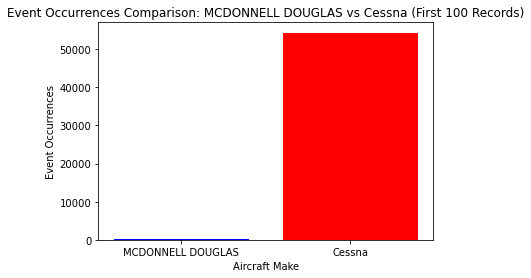

In [50]:
# Filter df_6 for rows with 'Make' equal to 'MCDONNELL DOUGLAS' and 'Cessna' up to index 100
md_df = df_6[df_6['Make'] == 'MCDONNELL DOUGLAS'].iloc[:100]
cessna_df = df_6[df_6['Make'] == 'Cessna'].iloc[:100]

# Calculate the total event occurrences for each make
md_event_count = md_df['Event_Count'].sum()
cessna_event_count = cessna_df['Event_Count'].sum()

# Create a bar plot
plt.bar(x=['MCDONNELL DOUGLAS', 'Cessna'], height=[md_event_count, cessna_event_count], color=['blue', 'red'])
plt.xlabel('Aircraft Make')
plt.ylabel('Event Occurrences')
plt.title('Event Occurrences Comparison: MCDONNELL DOUGLAS vs Cessna (First 100 Records)')
plt.show()



In [51]:
 # Save as PNG file
plt.savefig('BARPLOT.png') 

<Figure size 432x288 with 0 Axes>

In [52]:
"""
In conclusion, the best aircraft to purchase is the 'MCDONNELL DOUGLAS'.
The aircraft has recorded the least percentage occurrences of events as
compared to other aircrafts.
I highly recommend purchasing it after meticulously analyzing the Aviation Data.
"""

"\nIn conclusion, the best aircraft to purchase is the 'MCDONNELL DOUGLAS'.\nThe aircraft has recorded the least percentage occurrences of events as\ncompared to other aircrafts.\nI highly recommend purchasing it after meticulously analyzing the Aviation Data.\n"

In [53]:

# Export df_6 to a CSV file without including row indices
df_6.to_csv('', index=False)


FileNotFoundError: [Errno 2] No such file or directory: ''

In [ ]:
Event_Counts_df = event_counts_sorted.copy()

In [ ]:
Event_Counts_df.to_csv('EventCount.csv', index=False)

In [ ]:
Event_Counts_df